In [1]:
import sys
import os
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.signal import detrend
from pathlib import Path

sys.path.append(os.path.expanduser('~/Weave'))
from Weave.utils import collapse_restore_multiindex
from Weave.inspection import ImportanceData, MapInterface, dotplot, mapplot

#logging.basicConfig(level = logging.DEBUG)

In [79]:
#perm = ImportanceData(Path('/scistor/ivm/jsn295/importance_spatcov_q08_nf5'), 7, [0,-1,-3,-5,-7,-11,-15,-21,-31])
perm = ImportanceData(Path('/scistor/ivm/jsn295/importance_spatcov_q08_nf5'), [0,1,3,5,7,11,15,21,31], -15)
perm.load_data()
perm.scale_within(fill_na = True)
perm.reduce_over('fold', how = 'mean')
perm.reduce_over('clustid', how = 'max')

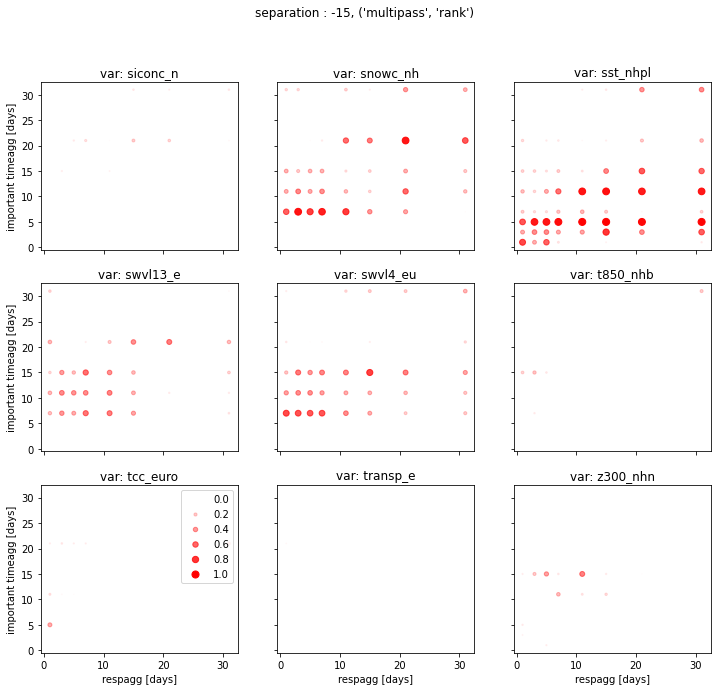

In [80]:
fig, axes = dotplot(perm.df.iloc[:,2], alphascaler = 1, nlegend_items=6)

In [14]:
shap = ImportanceData(basepath = Path('/scistor/ivm/jsn295/shaptest_standard'), respagg = 7, separation = [0,-1,-3,-5,-7,-11,-15,-21,-31])
shap.load_data(inputpath = Path('/scistor/ivm/jsn295/clusterpar3_roll_spearman_varalpha'))
shap.global_shap() # Reduces the column axis.
shap.reduce_over('clustid', how = 'max')

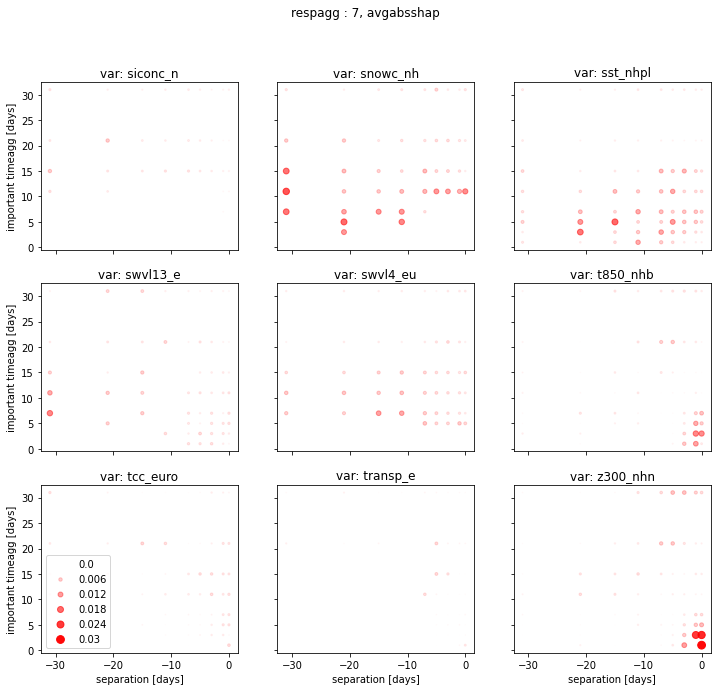

In [15]:
fig, axes = dotplot(shap.df.iloc[:,0], alphascaler = 32, sizescaler=2000, nlegend_items=6)

In [16]:
mapint = MapInterface(corclustpath=Path('/scistor/ivm/jsn295/clusterpar3_roll_spearman_varalpha/'))

Lets investigate the global importance of snowcover at -31. We need the clustids again

/scistor/ivm/jsn295/Weave/Weave/inspection.py:415: UserWarning: Rowkeys are thinned, so you could be losing some information here if not also present in the xarray name or attributes
  warnings.warn('Rowkeys are thinned, so you could be losing some information here if not also present in the xarray name or attributes')


(<Figure size 864x756 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aac6e629e48>,
       dtype=object))

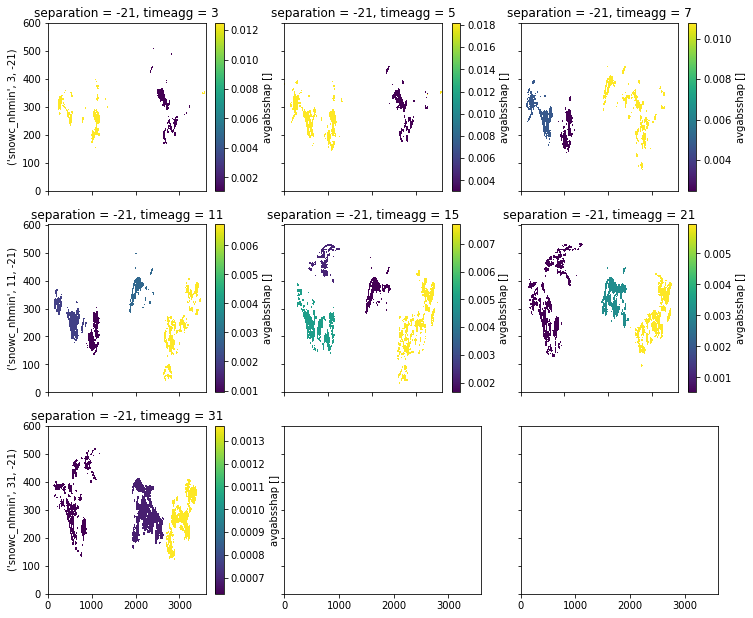

In [36]:
shap.load_data(inputpath = Path('/scistor/ivm/jsn295/clusterpar3_roll_spearman_varalpha'))
shap.global_shap() # Reduces the column axis.
mapresult = mapint.map_to_fields(shap.df.loc[(slice(None),'snowc_nhmin',slice(None),slice(None),-21),:].iloc[:,0])
mapplot(mapresult, wrap_per_row=3)

/scistor/ivm/jsn295/Weave/Weave/inspection.py:415: UserWarning: Rowkeys are thinned, so you could be losing some information here if not also present in the xarray name or attributes
  warnings.warn('Rowkeys are thinned, so you could be losing some information here if not also present in the xarray name or attributes')


(<Figure size 864x756 with 17 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aac679eed30>,
       dtype=object))

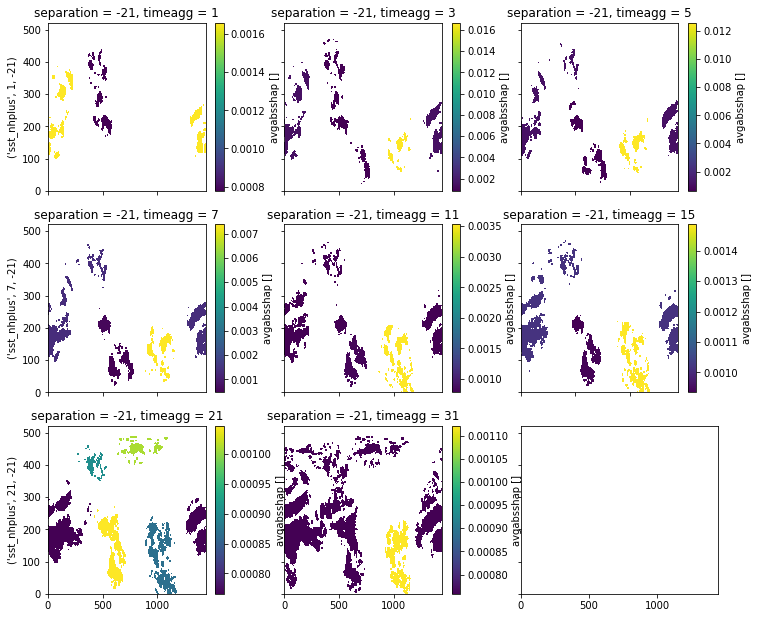

In [37]:
mapresult = mapint.map_to_fields(shap.df.loc[(slice(None),'sst_nhplus',slice(None),slice(None),-21),:].iloc[:,0])
mapplot(mapresult, wrap_per_row=3)

Now lets project the sst shap values at -21 for a sample. Reload the data because previously we reduced

/scistor/ivm/jsn295/Weave/Weave/inspection.py:415: UserWarning: Rowkeys are thinned, so you could be losing some information here if not also present in the xarray name or attributes
  warnings.warn('Rowkeys are thinned, so you could be losing some information here if not also present in the xarray name or attributes')


(<Figure size 864x756 with 17 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aad028f0320>,
       dtype=object))

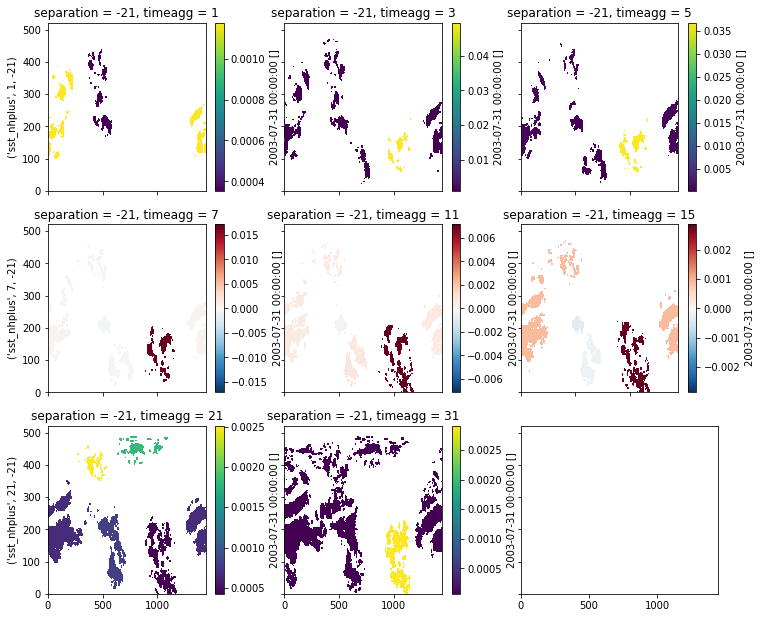

In [81]:
shap.load_data(inputpath = Path('/scistor/ivm/jsn295/clusterpar3_roll_spearman_varalpha'))
imps = shap.df.sort_index(axis = 1).loc[(slice(None),'sst_nhplus',slice(None),slice(None),-21),(slice(None),'2003-07-31')]
imps.columns = imps.columns.droplevel(0)
mapresult = mapint.map_to_fields(imps.iloc[:,0])
mapplot(mapresult, wrap_per_row=3)

1 and 3 day differ greatly in impact and clustering. Lets look what the sst anomalies pattern for them looked like

(<Figure size 864x504 with 12 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aad03140cc0>,
       dtype=object))

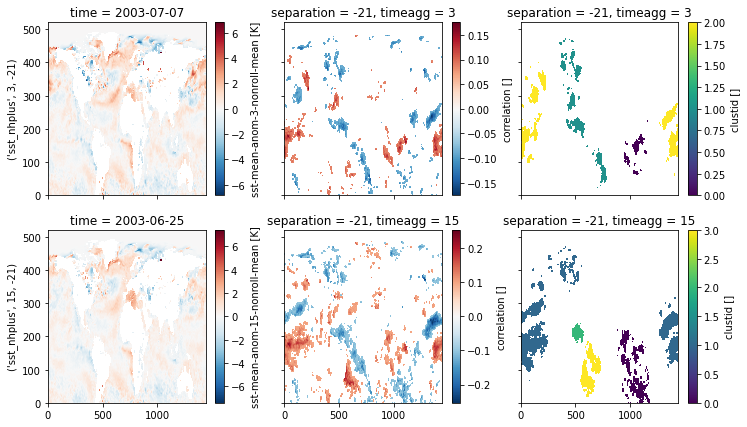

In [84]:
mapresult = mapint.get_anoms(imps.loc[(slice(None),slice(None),[3,15]),:], mask_with_clustid=False)
mapplot(mapresult)

In [57]:
shap.load_data(inputpath = Path('/scistor/ivm/jsn295/clusterpar3_roll_spearman_varalpha'))
imps = shap.df.sort_index(axis = 1).loc[:,(slice(None),'2003-07-31')].iloc[:,0]

In [69]:
imps2, oldnames = collapse_restore_multiindex(imps,axis = 0, ignore_level = ['respagg','lag','metric'])
imps2 = imps2.sort_values(ascending=False)

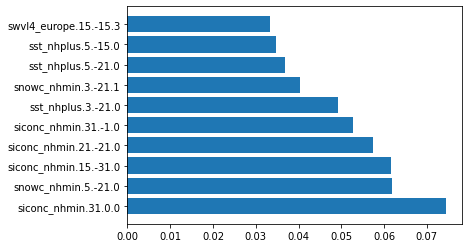

In [76]:
fig,ax = plt.subplots()
ax.barh(range(10), imps2.iloc[:10])
ax.set_yticks(range(10))
ax.set_yticklabels(imps2.index[:10])
plt.show()